In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install pyreadstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 8.8 MB/s 


In [3]:
import pyreadstat

## **Data dan Sumber Data**

Data yang digunakan adalah data Survei Angkatan Kerja Nasional Semester 2 - 2020 (Sakernas, 2020 - II) di Provinsi Maluku Utara

Kuesioner: https://sirusa.bps.go.id/sirusa/index.php/kuesioner/2620

In [4]:
df, meta = pyreadstat.read_sav('/content/sakernas.sav')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11826 entries, 0 to 11825
Columns: 136 entries, D_R to didikpub
dtypes: float64(132), object(4)
memory usage: 12.3+ MB


**Observation**: it has 11.826 records with 136 columns/variables

##**Pemilihan Variabel**


Karena banyaknya cakupan, variabel yang akan digunakan untuk analisis lebih lanjut dibatasi pada:
- `k4` = Jenis kelamin
- `r4` = status perkawinan
- `r6c` = lulus saat covid (agustus 2019-agustus 2020)
- `r22a` = status mencari kerja dalam seminggu terakhir (1/2)
- `r22b` = status mempersiapkan usaha dalam seminggu terakhir (1/2)
- `r25a` = alasan utama tidak mencari pekerjaan (1-10)
- `kode_kab` = kode kabupaten/kota
- `umurpub` = kode kelompok umur (1-12)
- `didikpub` = kode tingkat pendidikan terakhir yang ditamatkan (1-8)

variabel kontrol:
- `AK3` = status bekerja (bekerja, tidak bekerja, bukan angkatan kerja

## **Membuat dataframe untuk analisis lanjutan**

In [7]:
dataskr = df[['kode_kab', 'k4', 'r4', 'r6c','r22a', 'r22b', 'r25a',  'AK3','umurpub','didikpub']]
dataskr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11826 entries, 0 to 11825
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kode_kab  11826 non-null  float64
 1   k4        11826 non-null  float64
 2   r4        11826 non-null  float64
 3   r6c       11826 non-null  float64
 4   r22a      11826 non-null  float64
 5   r22b      11826 non-null  float64
 6   r25a      11826 non-null  float64
 7   AK3       11826 non-null  float64
 8   umurpub   11826 non-null  float64
 9   didikpub  11826 non-null  float64
dtypes: float64(10)
memory usage: 924.0 KB


**Obervation** : All data already in numeric data type

## **Summary of Labor Dataset**

rename the column first, so it is easier to be interpreted:

In [71]:
dataskr.rename(columns = {"k4": "Gender", "r4": "Marital_Stat", "r6c": "Covid_Grad", "r22a": "Looking_for_Job", "r22b": "Prepare_Business", "r25a": "NotLookingForJob_Reason", "AK3": "Labor_Stat", "umurpub": "AgeGroup", "didikpub": "Education"}, inplace=True)

checking the multicollinearity:

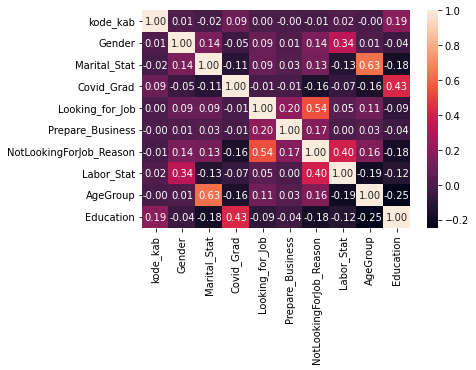

In [9]:
correlation = dataskr.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

**Observation :**
- Fortunately, no multicollinearity in choosen variables (using 0.8 rule of thumb as the threshold)
- The results may different if we choose more variables (some of variables are redundant such as region code and region name)
- Correlation that can be noticed are:
> - Correlation between Marital Status and Age of Group (0.63)
> - Correlation between Not Looking for Job Reason with the status of Looking for Job in unemployment (0.54)
> -  Correlation between people who graduated in Pandemic period in August 2019 - August 2020 with Education (0.43)
> - Correlation between Not Looking for Job Reason with the status Labor (employ, unemployment, not-a-labor-force)(0.40)
> - Correlation between Gender and the status of Labor (employ, unemployment, not-a-labor-force) (0.34)


## Create Labor Segmentation

- unemployment : `pengangguran`
- Labor that looking for a job: `pencarikerja`
- Labor that preparing a business: `siapusaha`
- Labor force (working and unemployment) : `angkatankerja`
- Working age population not in the labor force who are in schools, doing housekeeping, others, exclude personal activity. : `bukanAK`



In [10]:
angkatankerja = dataskr[dataskr['Labor_Stat'] < 3]
pekerja = dataskr[dataskr['Labor_Stat'] == 1]
pengangguran = dataskr[dataskr['Labor_Stat'] == 2]
pencarikerja = dataskr[dataskr['Looking_for_Job'] == 1]
siapusaha = dataskr[dataskr['Prepare_Business'] == 1]
bukanAK = dataskr[dataskr['Labor_Stat'] == 3]

In [11]:
bukanAK.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4641, 4642, 4643, 4644, 4645, 4646, 4647, 4648, 4649, 4650],
           dtype='int64', length=4269)

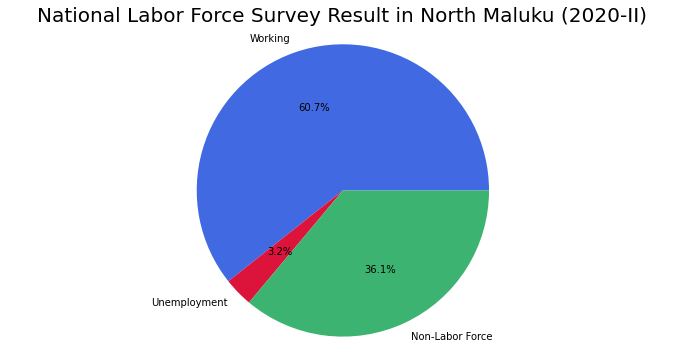

In [58]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([len(pekerja.index), len(pengangguran.index), len(bukanAK.index)])
mylabels = ["Working", "Unemployment", "Non-Labor Force"]
colors= ['royalblue','crimson','mediumseagreen']

plt.figure(figsize = (12, 6))
plt.pie(x, labels=mylabels,
        colors=colors,
        autopct='%1.1f%%' )
#plt.legend(mylabels)
plt.title('National Labor Force Survey Result in North Maluku (2020-II)', fontsize=20)
plt.axis('equal')
plt.show() 

In [13]:
angkatankerja.head()

,kode_kab,Gender,Marital_Stat,Covid_Grad,Looking_for_Job,Prepare_Business,NotLookingForJob_Reason,Labor_Stat,AgeGroup,Education
11,1.0,2.0,4.0,2.0,1.0,2.0,0.0,2.0,11.0,6.0
46,1.0,1.0,2.0,0.0,1.0,2.0,0.0,2.0,9.0,2.0
58,1.0,1.0,2.0,2.0,1.0,2.0,0.0,2.0,11.0,5.0
77,1.0,1.0,2.0,2.0,1.0,2.0,0.0,2.0,10.0,3.0
84,1.0,1.0,2.0,2.0,1.0,2.0,0.0,2.0,11.0,3.0


## **EDA Sebaran Data Ketenagakerjaan Maluku Utara (Sakernas, 2020)**

## Angkatan Kerja

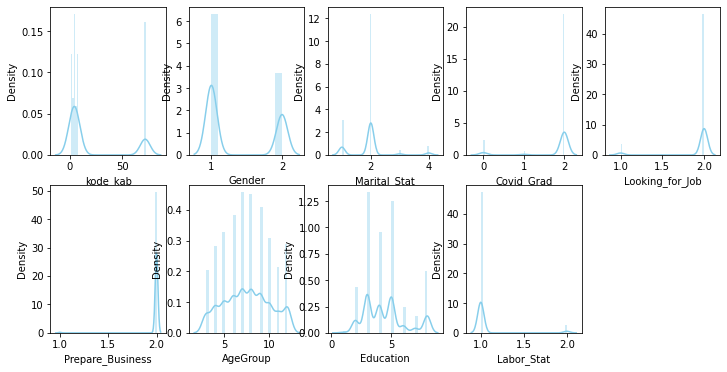

In [72]:
plt.figure(figsize=(12,6))
features = ['kode_kab', 'Gender', 'Marital_Stat', 'Covid_Grad','Looking_for_Job', 'Prepare_Business', 'AgeGroup', 'Education', 'Labor_Stat']
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=angkatankerja[features[i]], color='skyblue')
    plt.xlabel(features[i])
    errors='coerce'

**Observation:**
- Labor force in Norten Maluku spread balance (proportional to it polulation) all over regions
- Labor force dominated by man than woman
- Most of the labor force are married
- Only small part of them graduated in pandemic period
- Small part of them are now preparing a business
- Age of labour force are spread balance in all of the group age, with highest numbers in range 35 yo - 44 yo
- Education level of labor dominated by high school Graduate (middle school, high school, and vocational high school)
- Unemployment rate consider small


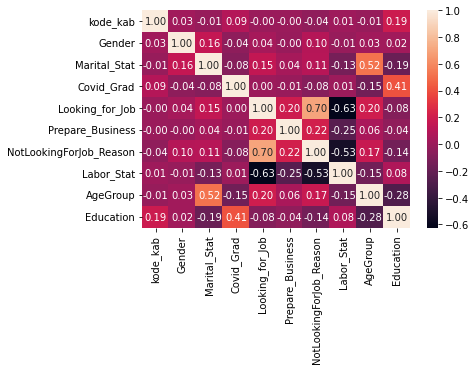

In [15]:
correlation = angkatankerja.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

**Observation:**
- Based on 0.8 correlation, there are no feature that needs to be dropped. But there are some noticable correaltion:
- there is a noticable correlation between Reason Why People not Looking for a Job, with Status of Looking for a Job (0.7)
- there is noticable correlation between Marital Status and Age Group
- there is also noticable correlation between People Who Graduate at pandemic period (August 2019 - Augus 2020) with Education level (0.41)

### Dictionary

In [16]:
education_dict = {
    1 :'Belum SD',
    2 :'SD',
    3 :'SMP',
    4 :'SMA',
    5 :'SMK',
    6 :'DI/DII/DIII',
    7:'DIV', 
    8: 'S1/S2/S3'
}

sex_dict = {
    1 :'Laki-Laki',
    2 :'Perempuan'
}

age_dict = {
    1 :'0-9',
    2 :'10-14',
    3 :'15-19',
    4 :'20-24',
    5 :'25-29',
    6 :'30-34',
    7:'35-39', 
    8:'40-44',
    9:'45-49',
    10: '50-54',
    11: '55-59',
    12: '60++'
}

marital_dict = {
    1 :'Belum Menikah',
    2 :'Menikah',
    3 :'Cerai Hidup',
    4 :'Cerai Mati'
}

reason_dict = {
    1 :'Belum Mulai Kerja',
    2 :'Menyiapkan Usaha',
    3 :'Putus Asa',
    4 :'Sudah ada kerja',
    5 :'Urus Rumah/Sekolah',
    6 :'Tidak ada Modal',
    7:'Takud Cov', 
    8: 'PSBB',
    9: 'Tidak Mampu',
    10: 'dll'
}

In [17]:
angkatankerja_disp = angkatankerja.copy()

In [18]:
angkatankerja_disp['Education'] = angkatankerja_disp['Education'].map(education_dict)
angkatankerja_disp['Gender'] = angkatankerja_disp['Gender'].map(sex_dict)
angkatankerja_disp['AgeGroup'] = angkatankerja_disp['AgeGroup'].map(age_dict)

Text(0.5, 1.0, 'Labor Force in North Maluku Based on Education and Gender (NLFS, 2020-II)')

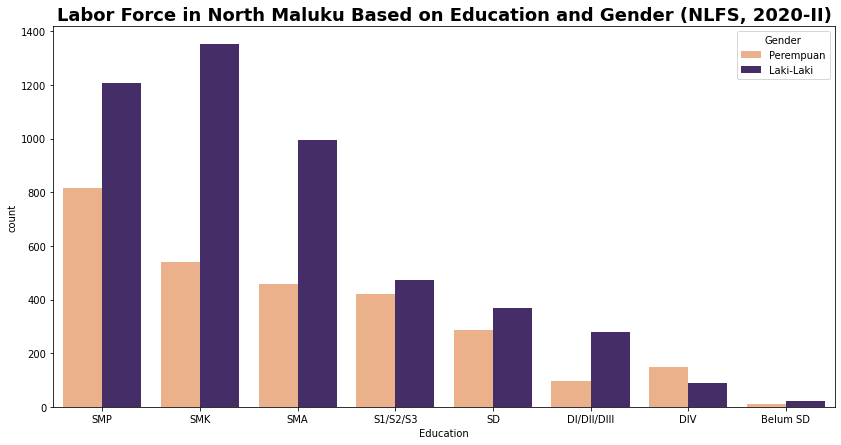

In [60]:
plt.figure(figsize = (14, 7))
cp1 = sns.countplot(data=angkatankerja_disp,
            hue='Gender', order = angkatankerja_disp['Education'].value_counts().index[::1],
            x='Education', palette=["#FAAE7B", "#432371"])
#cp1.set_xlabel("Level of Education", fontsize = 12)
cp1.set_title('Labor Force in North Maluku Based on Education and Gender (NLFS, 2020-II)', fontsize=18, fontweight='bold', color='black')

Observationn:
- In general, Labor Force in Northern Maluku dominated by Midle Highschool educational background (suspected still continue their school), followed by Vocational Highschool.

Text(0.5, 1.0, 'Labor Force in North Maluku Based on Education and Age Group (NLFS, 2020-II)')

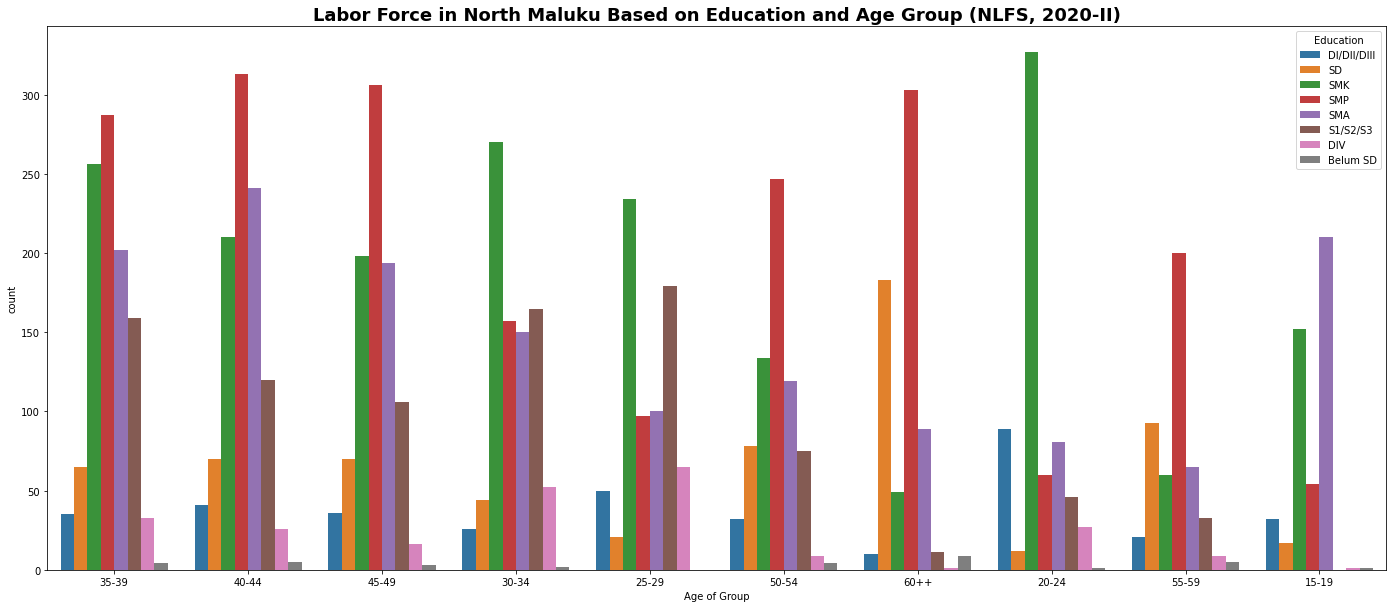

In [21]:
plt.figure(figsize = (24, 10))
cp2 = sns.countplot(data=angkatankerja_disp,
            order = angkatankerja_disp['AgeGroup'].value_counts().index[::1],
            hue='Education', 
            x='AgeGroup')
cp2.set_xlabel("Age of Group")
cp2.set_title('Labor Force in North Maluku Based on Education and Age Group (NLFS, 2020-II)', fontsize=18, fontweight='bold', color='black')

**Observasi:**
- In general, labor force in Northern Maluku dominated by age group between 35-39 yo, followed by age group between 40-44 yo.


## Pengangguran (Unemployment)

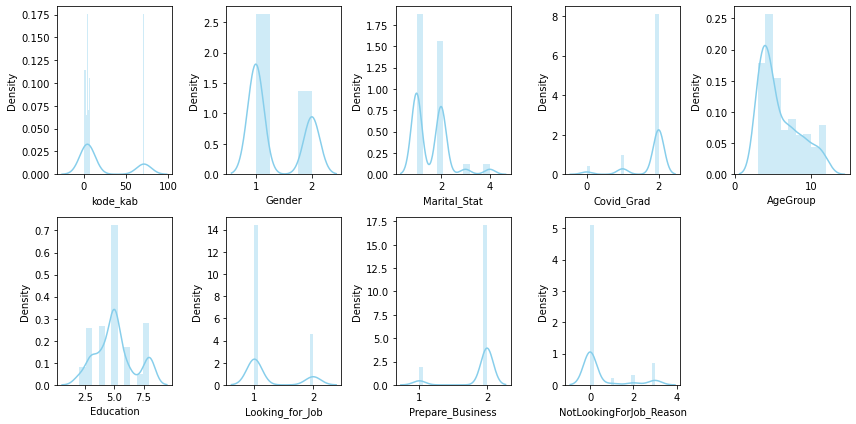

In [73]:
plt.figure(figsize=(12,6))
features = ['kode_kab', 'Gender', 'Marital_Stat', 'Covid_Grad', 'AgeGroup', 'Education', 'Looking_for_Job', 'Prepare_Business', 'NotLookingForJob_Reason']
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=pengangguran[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()
    errors='coerce'

**Observation:**
- Unemployment in Norther Maluku consist of more man than woman (allign with the gender proportion in labor force)
- Unemployment in Single person are higher than married person.
- Small part of them are graduated in the pandemic period
- Most of the unemployment are in the adjacent age group, dominant by the age between 20 yo - 25 yo.
- Some of the unemployment are not looking for job either. The reasons are vary: already had a job but not start yet; currently preparing a business; but mostly because they feel hopeless that they can get a job
- Surprisingly, unemployment in Northen Maluku dominated by they who had Vocational Highschool education level
- Another surprise:  Unemployment numbers between middle highschool, highschool and Higher Education level are same. 


In [23]:
pengangguran_disp = pengangguran.copy()

In [24]:
pengangguran.head()

,kode_kab,Gender,Marital_Stat,Covid_Grad,Looking_for_Job,Prepare_Business,NotLookingForJob_Reason,Labor_Stat,AgeGroup,Education
11,1.0,2.0,4.0,2.0,1.0,2.0,0.0,2.0,11.0,6.0
46,1.0,1.0,2.0,0.0,1.0,2.0,0.0,2.0,9.0,2.0
58,1.0,1.0,2.0,2.0,1.0,2.0,0.0,2.0,11.0,5.0
77,1.0,1.0,2.0,2.0,1.0,2.0,0.0,2.0,10.0,3.0
84,1.0,1.0,2.0,2.0,1.0,2.0,0.0,2.0,11.0,3.0


In [25]:
pengangguran_disp['Education'] = pengangguran_disp['Education'].map(education_dict)
pengangguran_disp['Gender'] = pengangguran_disp['Gender'].map(sex_dict)
pengangguran_disp['AgeGroup'] = pengangguran_disp['AgeGroup'].map(age_dict)



In [26]:
pengangguran_disp.head()

,kode_kab,Gender,Marital_Stat,Covid_Grad,Looking_for_Job,Prepare_Business,NotLookingForJob_Reason,Labor_Stat,AgeGroup,Education
11,1.0,Perempuan,4.0,2.0,1.0,2.0,0.0,2.0,55-59,DI/DII/DIII
46,1.0,Laki-Laki,2.0,0.0,1.0,2.0,0.0,2.0,45-49,SD
58,1.0,Laki-Laki,2.0,2.0,1.0,2.0,0.0,2.0,55-59,SMK
77,1.0,Laki-Laki,2.0,2.0,1.0,2.0,0.0,2.0,50-54,SMP
84,1.0,Laki-Laki,2.0,2.0,1.0,2.0,0.0,2.0,55-59,SMP


Text(0.5, 1.0, 'Unemployment in North Maluku Based on Education and Gender (NLFS, 2020-II)')

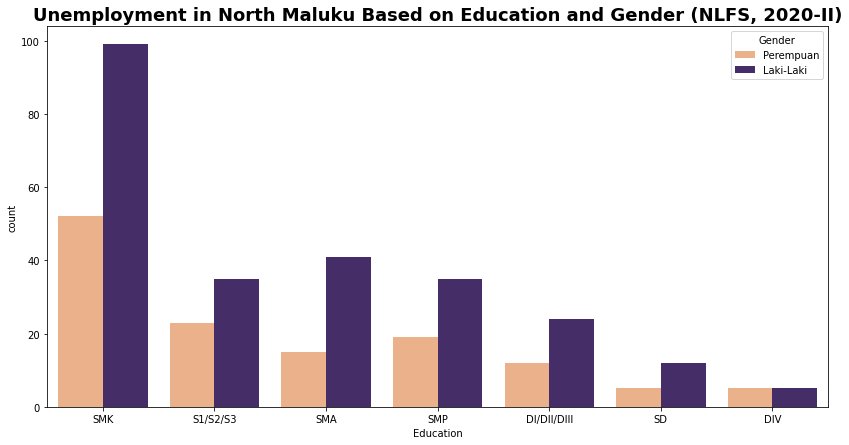

In [61]:
plt.figure(figsize = (14, 7))
cp1 = sns.countplot(data=pengangguran_disp,
            hue='Gender', order = pengangguran_disp['Education'].value_counts().index[::1],
            x='Education', palette = ["#FAAE7B", "#432371"])
#cp1.set_xlabel("Level of Education", fontsize = 12)
cp1.set_title('Unemployment in North Maluku Based on Education and Gender (NLFS, 2020-II)', fontsize=18, fontweight='bold', color='black')

**Observation:**
- Unemployment in Northern Maluku dominated by labor force who has Vocational Highschool education background, followed by they who graduate from higher education.
- Dominated by Man than woman

Text(0.5, 1.0, 'Unemployment in North Maluku Based on Education and Age Group (NLFS, 2020-II)')

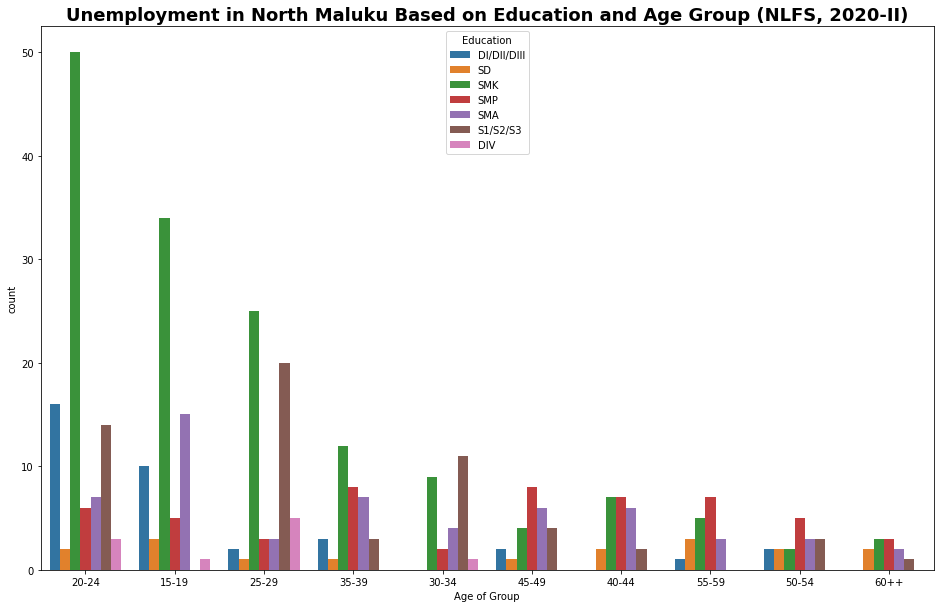

In [29]:
plt.figure(figsize = (16, 10))
cp2 = sns.countplot(data=pengangguran_disp,
            order = pengangguran_disp['AgeGroup'].value_counts().index[::1],
            hue='Education', 
            x='AgeGroup')
cp2.set_xlabel("Age of Group")
cp2.set_title('Unemployment in North Maluku Based on Education and Age Group (NLFS, 2020-II)', fontsize=18, fontweight='bold', color='black')

**Observation:**
- Unemployment in Northen Maluku dominated by labor force between 20 yo - 24 yo with educational background from Vocational Highschool
-There is significant unemployment of Higher Education background people in aged between 25 - 29 yo.

## Bukan Angkatan Kerja

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



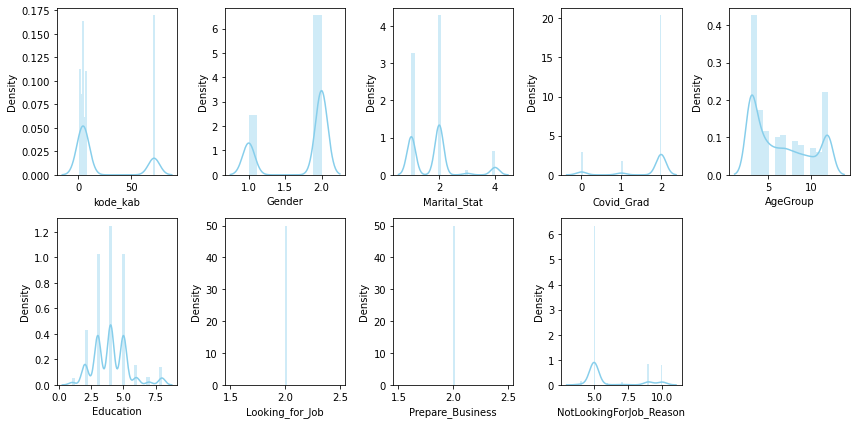

In [75]:
plt.figure(figsize=(12,6))
features = ['kode_kab', 'Gender', 'Marital_Stat', 'Covid_Grad', 'AgeGroup', 'Education', 'Looking_for_Job', 'Prepare_Business', 'NotLookingForJob_Reason']
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=bukanAK[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()
    errors='coerce'

**Observation:**
- Non-Labor Force in Northern Maluku mostly consist of people who fo housekeeping or currently continue their education
- Non Labor force dominated by woman than man
- Non Labor dominated by poeple with Highschool educational background
- Non-labor force mostly married

In [31]:
bukanAK_disp = bukanAK.copy()

In [32]:
bukanAK_disp['Education'] = bukanAK_disp['Education'].map(education_dict)
bukanAK_disp['Gender'] = bukanAK_disp['Gender'].map(sex_dict)
bukanAK_disp['AgeGroup'] = bukanAK_disp['AgeGroup'].map(age_dict)
bukanAK_disp['Marital_Stat'] = bukanAK_disp['Marital_Stat'].map(marital_dict)

Text(0.5, 1.0, 'Non-Labor Force in North Maluku Based on Education and Gender (NLFS, 2020 - II)')

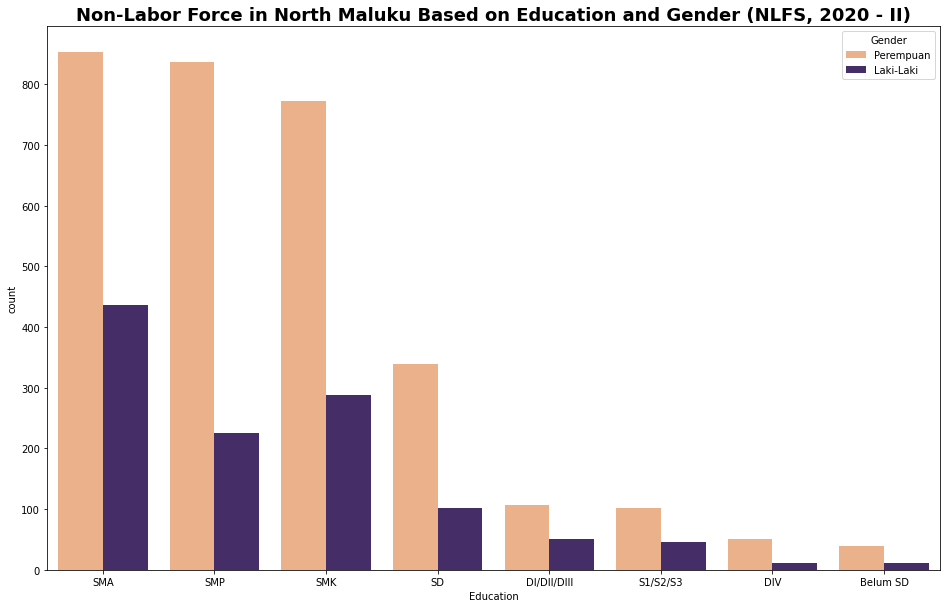

In [63]:
plt.figure(figsize = (16, 10))
cp1 = sns.countplot(data=bukanAK_disp, order = bukanAK_disp['Education'].value_counts().index[::1],
            hue='Gender',
            x='Education', palette = ["#FAAE7B", "#432371"])
#cp1.set_xlabel("Level of Education", fontsize = 12)
cp1.set_title('Non-Labor Force in North Maluku Based on Education and Gender (NLFS, 2020 - II)', fontsize=18, fontweight='bold', color='black')

**Observation:**
- Non labor force dominated by women in every level of educational background, with the highes number in highschool level education

Text(0.5, 1.0, 'Non-Labor Force in North Maluku Based on Age Group and Gender (NLFS, 2020-II)')

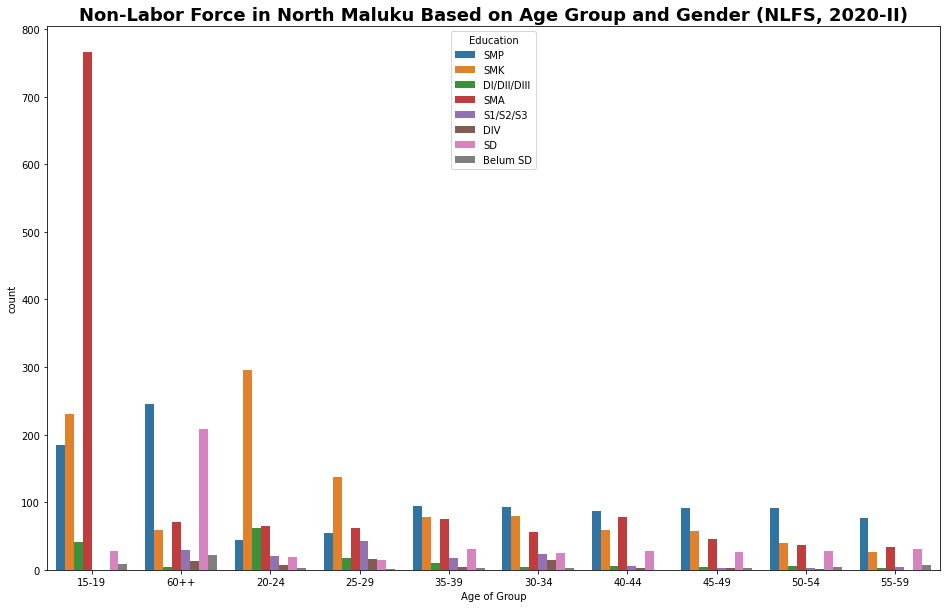

In [65]:
plt.figure(figsize = (16, 10))
cp2 = sns.countplot(data=bukanAK_disp, order = bukanAK_disp['AgeGroup'].value_counts().index[::1],
            hue='Education',
            x='AgeGroup')
cp2.set_xlabel("Age of Group")
cp2.set_title('Non-Labor Force in North Maluku Based on Age Group and Gender (NLFS, 2020-II)', fontsize=18, fontweight='bold', color='black')

**Observation:**
- Non Labor force dominated by younger age (15 - 19 yo) that has highschool education (suspected of continuing school/to higher education)
- It followed by oldest age group (60++), and 20-24 yo age group with Vocational Highschool background

Text(0.5, 1.0, 'Non-Labor Force Based on AgeGroup and Marital Status (NLFS, 2020-II)')

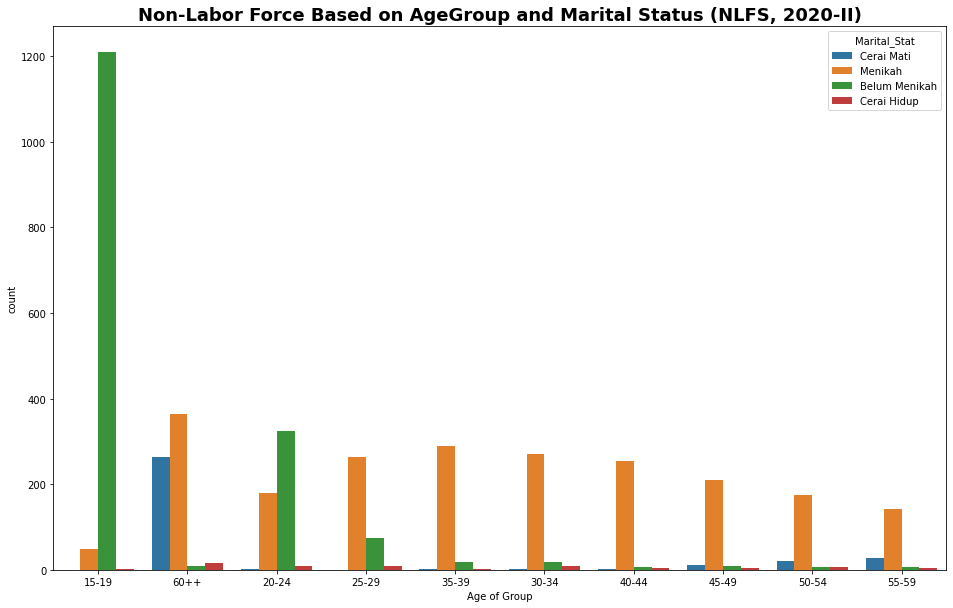

In [37]:
plt.figure(figsize = (16, 10))
cp2 = sns.countplot(data=bukanAK_disp, order = bukanAK_disp['AgeGroup'].value_counts().index[::1],
            hue='Marital_Stat',
            x='AgeGroup')
cp2.set_xlabel("Age of Group")
cp2.set_title('Non-Labor Force Based on AgeGroup and Marital Status (NLFS, 2020-II)', fontsize=18, fontweight='bold', color='black')

Observation:
- Non labor force mostly from younger age (15-19 yo) who not yet married, followed by 60++ group age who married, and 20-24 yo who not yet married.

## **Random Forest Model**

- Untuk mengetahui metode terbaik pemodelan Random Forest, maka akan dibandingkan antara 3 metode : Undersampling, Oversampling, dan Combined Method
- Untuk setiap metode akan dilihat berapa akurasi, presisi, recall dan F1 score nya
- True Positif: Yang diklasifikasi pekerja adalah pekerja
- True Negatif: yang diklasifikasi pengangguran adalah pengangguran
- False positif: Yang diklasifikasi pengangguran adalah pekerja
- False negatif: Yang diklasifikasi pekerja adalah pengangguran
- Tujuan model: mengurangi false negatif, maka perlu yang recall nya tinggi

In [38]:
dataskr['Labor_Stat'].value_counts()

1.0    7175
3.0    4269
2.0     382
Name: Labor_Stat, dtype: int64

In [39]:
dataskr_update = dataskr[dataskr["Labor_Stat"] < 3]

In [40]:
dataskr_update['Labor_Stat'].value_counts()

1.0    7175
2.0     382
Name: Labor_Stat, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
df_train, df_test = train_test_split(dataskr_update, 
                                     test_size = 0.2, random_state = 1) 

In [43]:
x_train_data = df_train.loc[:, df_train.columns!='Labor_Stat']
y_train_data = df_train.loc[:, df_train.columns=='Labor_Stat']

x_test_data = df_test.loc[:, df_test.columns!='Labor_Stat']
y_test_data = df_test.loc[:, df_test.columns=='Labor_Stat']

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [45]:
def evaluate(model, x_test = x_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)    
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))
    

In [78]:
base_model = RandomForestClassifier()
base_model.fit(x_train_data, y_train_data)
evaluate(base_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 0.9603174603174603
------
Confusion Matrix:

              precision    recall  f1-score   support

         1.0       0.98      0.97      0.98      1435
         2.0       0.60      0.69      0.64        77

    accuracy                           0.96      1512
   macro avg       0.79      0.83      0.81      1512
weighted avg       0.96      0.96      0.96      1512

------
Assuming 1 as positive, we get:

True Positive: 53
True Negative: 1399
False Positive: 36
False Negative: 24

Precision: 0.5955056179775281
Recall: 0.6883116883116883
F1-Score: 0.6385542168674699


##**Undersampling**

In [47]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train_data['Labor_Stat']))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
x_train_under, y_train_under = undersample.fit_resample(x_train_data, 
                                                        y_train_data)

# summarize class distribution
print(Counter(y_train_under['Labor_Stat']))

Counter({1.0: 5740, 2.0: 305})
Counter({1.0: 305, 2.0: 305})


In [48]:
under_model = RandomForestClassifier()
under_model.fit(x_train_under, y_train_under)
evaluate(under_model, x_test_data, y_test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.9484126984126984
------
Confusion Matrix:

              precision    recall  f1-score   support

         1.0       1.00      0.95      0.97      1435
         2.0       0.50      0.95      0.65        77

    accuracy                           0.95      1512
   macro avg       0.75      0.95      0.81      1512
weighted avg       0.97      0.95      0.96      1512

------
Assuming 1 as positive, we get:

True Positive: 73
True Negative: 1361
False Positive: 74
False Negative: 4

Precision: 0.4965986394557823
Recall: 0.948051948051948
F1-Score: 0.6517857142857143


##**Oversampling**

In [49]:
# import random undersampling library 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train_data['Labor_Stat']))

# define undersample strategy
SMOTE = SMOTE()

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train_data, y_train_data)

# summarize class distribution
print(Counter(y_train_SMOTE['Labor_Stat']))

Counter({1.0: 5740, 2.0: 305})
Counter({1.0: 5740, 2.0: 5740})


In [50]:
over_model = RandomForestClassifier()
over_model.fit(x_train_SMOTE, y_train_SMOTE)
evaluate(over_model, x_test_data, y_test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.958994708994709
------
Confusion Matrix:

              precision    recall  f1-score   support

         1.0       0.98      0.97      0.98      1435
         2.0       0.58      0.70      0.64        77

    accuracy                           0.96      1512
   macro avg       0.78      0.84      0.81      1512
weighted avg       0.96      0.96      0.96      1512

------
Assuming 1 as positive, we get:

True Positive: 54
True Negative: 1396
False Positive: 39
False Negative: 23

Precision: 0.5806451612903226
Recall: 0.7012987012987013
F1-Score: 0.6352941176470589


##**Combine Method**

In [51]:
# import needed libraries 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# define pipeline
combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('model', combined_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
pipeline.fit(x_train_data, y_train_data)
evaluate(pipeline, x_test_data, y_test_data)

/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py:266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)


Accuracy: 0.9603174603174603
------
Confusion Matrix:

              precision    recall  f1-score   support

         1.0       0.99      0.97      0.98      1435
         2.0       0.59      0.74      0.66        77

    accuracy                           0.96      1512
   macro avg       0.79      0.86      0.82      1512
weighted avg       0.97      0.96      0.96      1512

------
Assuming 1 as positive, we get:

True Positive: 57
True Negative: 1395
False Positive: 40
False Negative: 20

Precision: 0.5876288659793815
Recall: 0.7402597402597403
F1-Score: 0.6551724137931034


# Modelling Evaluation

Metode terbaik dari evaluasi di atas adalah **Random Forest Combines Method** dengan pertimbangan F1 score nya paling besar diantara 3 metode yaitu 0.655 dengan recall yang juga cukup tinggi yaitu 0.74. Recall dipertimbangkan karena dalam kasus ini kita ingin mengurangi false negatif (diklasifikasi pekerja ternyata pengangguran)
